ANALIZA GŁÓWNYCH SKŁADOWYCH

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


współczynnik wyjaśnionych wariancji (10 pierwszych składowych): [0.12033916 0.09561054 0.08444415 0.06498408 0.04860154]
suma wyjaśnionych wariancji (10 pierwszych składowych): 0.41397946973311606
[[ 1.91421369 -0.95450212 -3.94603417  2.02872302 -0.26728669]
 [ 0.58898016  0.92463603  3.92475285 -1.77984256 -0.99355215]
 [ 1.30203913 -0.31718867  3.02333307 -2.04336237 -2.081013  ]
 ...
 [ 1.02259607 -0.14790961  2.46997146 -0.62026609 -0.97170272]
 [ 1.07605511 -0.38090612 -2.45549274 -1.31194331  0.25344957]
 [-1.25770208 -2.22759108  0.28362766 -0.12705247 -1.56992811]]


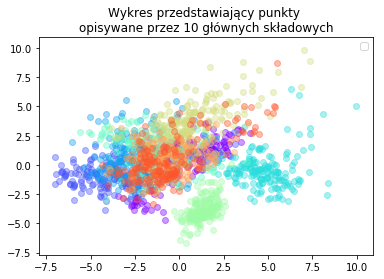

In [3]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.cm as cm

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

#analiza głównych składowych
pca = PCA(n_components=5)
data_r = pca.fit(data).transform(data)

print('współczynnik wyjaśnionych wariancji (10 pierwszych składowych): %s' % str(pca.explained_variance_ratio_))
print('suma wyjaśnionych wariancji (10 pierwszych składowych): %s' % str(sum(pca.explained_variance_ratio_)))

x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(10)]

plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4)
    plt.legend()
    plt.title('Wykres przedstawiający punkty \n' 'opisywane przez 10 głównych składowych')
    
    
print(data_r)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.91      0.94      0.93        88
          1       0.82      0.71      0.76        91
          2       0.82      0.83      0.82        86
          3       0.51      0.81      0.63        91
          4       0.91      0.93      0.92        92
          5       0.69      0.52      0.59        91
          6       0.96      0.96      0.96        91
          7       0.75      0.81      0.78        89
          8       0.60      0.41      0.49        88
          9       0.47      0.45      0.46        92

avg / total       0.74      0.74      0.73       899


Confusion matrix:
[[83  0  0  0  2  0  3  0  0  0]
 [ 0 65  6  0  2  0  1  0  5 12]
 [ 0  1 71  7 

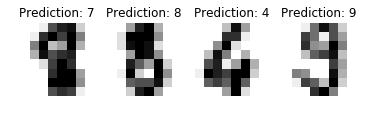

In [5]:
from sklearn import datasets, svm, metrics

n_samples = len(digits.images)
data = data_r.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


współczynnik wyjaśnionych wariancji (10 pierwszych składowych): [0.12033916 0.09561054 0.08444415 0.06498408 0.04860154]
suma wyjaśnionych wariancji (10 pierwszych składowych): 0.41397946973311606


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


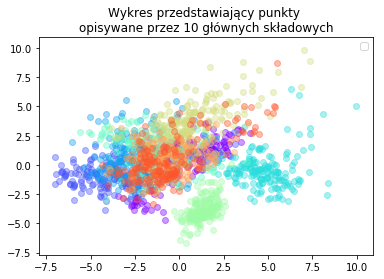

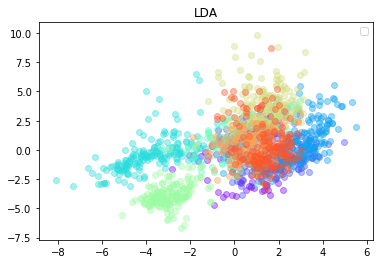

In [6]:
#liniowa analiza dyskryminacyjna LDA

lda = LDA(n_components=2)
data_r2 = lda.fit(data, labels).transform(data)

print('współczynnik wyjaśnionych wariancji (10 pierwszych składowych): %s' % str(pca.explained_variance_ratio_))
print('suma wyjaśnionych wariancji (10 pierwszych składowych): %s' % str(sum(pca.explained_variance_ratio_)))

x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(10)]

plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4)
    plt.legend()
    plt.title('Wykres przedstawiający punkty \n' 'opisywane przez 10 głównych składowych')
    
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    plt.scatter(data_r2[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4)
    plt.legend()
    plt.title('LDA')
    

ALGORYTM k-średnich

n_digits: 10, 	 n_samples: 1797, 	 n_features: 64
_________________________________________________________________________
inic.         czas   inercja   hom.   zup.   traf.   ARI     sylwetka
k-means++   0.79s    69845   0.654   0.698   0.675   0.542    0.101
      PCA   0.10s    70768   0.668   0.695   0.681   0.558    0.161
_________________________________________________________________________


/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


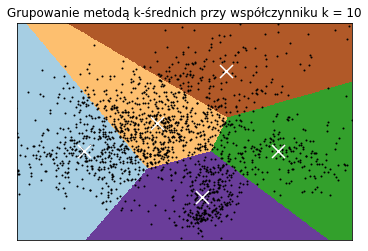

In [11]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

print("n_digits: %d, \t n_samples: %d, \t n_features: %d"
      % (n_digits, n_samples, n_features))


print(73 * '_')
print('% 9s' % 'inic.'
      '         czas   inercja   hom.   zup.   traf.   ARI     sylwetka')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
             name="k-means++", data=data)

# bench_k_means(KMeans(init='k-means++', n_clusters=1, n_init=10),
#              name="k-means++", data=data)


pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
              name="PCA",
              data=data)
print(73 * '_')

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=12)
kmeans.fit(reduced_data)

h = .03     # point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Grupowanie metodą k-średnich przy współczynniku k = 10')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

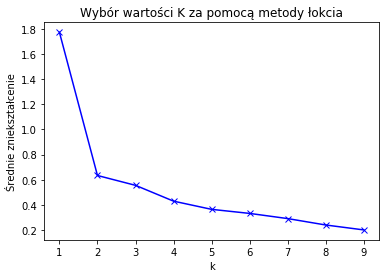

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.1, 1.5, (2, 10))
cluster2 = np.random.uniform(4.2, 1.9, (2,10))
X = np.hstack((cluster1, cluster2)).T

K = range(1, 10)
meandistortions = []
for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis = 1))/ X.shape[0])
        
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Średnie zniekształcenie')
plt.title('Wybór wartości K za pomocą metody łokcia')
plt.show()


SIECI KOHONENA

In [13]:
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn


def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.

    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class Som:
    def __init__(self,x,y,input_len,sigma=1.0,learning_rate=0.5,random_seed=None):
        """
            Initializes a Self Organizing Maps.
            x,y - dimensions of the SOM
            input_len - number of the elements of the vectors in input
            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)
            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)
            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        self.weights = array([v/linalg.norm(v) for v in self.weights]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self,x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x,self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index]) # || x - w ||
            it.iternext()

    def activate(self,x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self,c,sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0],2)/d)
        ay = exp(-power(self.neigy-c[1],2)/d)
        return outer(ax,ay) # the external product gives a matrix

    def diff_gaussian(self,c,sigma):
        """ Mexican hat centered in c (unused) """
        xx,yy = meshgrid(self.neigx,self.neigy)
        p = power(xx-c[0],2) + power(yy-c[1],2)
        d = 2*pi*sigma*sigma
        return exp(-(p)/d)*(1-2/d*p)

    def winner(self,x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(),self.activation_map.shape)

    def update(self,x,win,t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        # eta(t) = eta(0) / (1 + t/T) 
        # keeps the learning rate nearly constant for the first T iterations and then adjusts it
        eta = self.learning_rate/(1+t/self.T)
        sig = self.sigma/(1+t/self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win,sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])            
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self,data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i,x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q


    def random_weights_init(self,data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[int(self.random_generator.rand()*len(data)-1)]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self,data,num_iteration):        
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)        
        for iteration in range(num_iteration):
            rand_i = int(round(self.random_generator.rand()*len(data)-1)) # pick a random sample
            self.update(data[rand_i],self.winner(data[rand_i]),iteration)

    def train_batch(self,data,num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx],self.winner(data[idx]),iteration)
            iteration += 1

    def _init_T(self,num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2 # keeps the learning rate nearly constant for the first half of the iterations

    def distance_map(self):
        """ Returns the average distance map of the weights.
            (Each mean is normalized in order to sum up to 1) """
        um = zeros((self.weights.shape[0],self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1,it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1,it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii,jj,:]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self,data):
        """ 
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0],self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self,data):
        """ 
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.            
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self,data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

### unit tests
from numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal

class TestSom:
    def setup_method(self, method):
        self.som = Som(5,5,1)
        for w in self.som.weights: # checking weights normalization
            assert_almost_equal(1.0,linalg.norm(w))
        self.som.weights = zeros((5,5)) # fake weights
        self.som.weights[2,3] = 5.0
        self.som.weights[1,1] = 2.0

    def test_fast_norm(self):
        assert fast_norm(array([1,3])) == sqrt(1+9)

    def test_gaussian(self):
        bell = self.som.gaussian((2,2),1)
        assert bell.max() == 1.0
        assert bell.argmax() == 12  # unravel(12) = (2,2)

    def test_win_map(self):
        winners = self.som.win_map([5.0,2.0])
        assert winners[(2,3)][0] == 5.0
        assert winners[(1,1)][0] == 2.0

    def test_activation_reponse(self):
        response = self.som.activation_response([5.0,2.0])
        assert response[2,3] == 1
        assert response[1,1] == 1

    def test_activate(self):
        assert self.som.activate(5.0).argmin() == 13.0  # unravel(13) = (2,3)
     
    def test_quantization_error(self):
        self.som.quantization_error([5,2]) == 0.0
        self.som.quantization_error([4,1]) == 0.5

    def test_quantization(self):
        q = self.som.quantization(array([4,2]))
        assert q[0] == 5.0
        assert q[1] == 2.0

    def test_random_seed(self):
        som1 = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        som2 = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        assert_array_almost_equal(som1.weights,som2.weights) # same initialization
        data = random.rand(100,2)
        som1 = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        som1.train_random(data,10)
        som2 = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        som2.train_random(data,10)
        assert_array_almost_equal(som1.weights,som2.weights) # same state after training

    def test_train_batch(self):
        som = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        data = array([[4,2],[3,1]])
        q1 = som.quantization_error(data)
        som.train_batch(data,10)
        assert q1 > som.quantization_error(data)

    def test_train_random(self):
        som = Som(5,5,2,sigma=1.0,learning_rate=0.5,random_seed=1)
        data = array([[4,2],[3,1]])
        q1 = som.quantization_error(data)
        som.train_random(data,10)
        assert q1 > som.quantization_error(data)

    def test_random_weights_init(self):
        som = Som(2,2,2,random_seed=1)
        som.random_weights_init(array([[1.0,.0]]))
        for w in som.weights:
            assert_array_equal(w[0],array([1.0,.0]))

Inicjowanie sieci Kohenena.

 Przetwarzanie zakończone.


/home/rzar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/rzar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/rzar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/rzar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/rzar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise compar

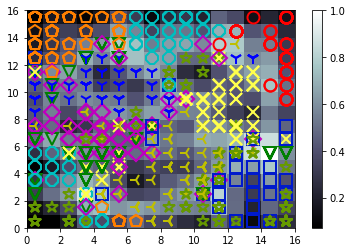

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 22 14:02:30 2015

@author: a-johear
"""

import numpy as np
from sklearn.datasets import load_digits


digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

som = Som(16,16,64,sigma=1.3,learning_rate=0.5)
som.random_weights_init(data)
print("Inicjowanie sieci Kohenena.")
som.train_random(data,10000) 
print("\n Przetwarzanie zakończone.")

from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) 
colorbar()

labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
 w = som.winner(xx) 
 plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markerfacecolor='None',
   markeredgecolor=colors[labels[cnt]],markersize=12,markeredgewidth=2)
axis([0,som.weights.shape[0],0,som.weights.shape[1]])
show()



#reduced_data = Som(16,16,64,sigma=1.3,learning_rate=0.5).fit_transform(data)


#from sklearn.cluster import KMeans

#kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
#kmeans.fit(reduced_data)